# Problem Statement
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



In [1]:
ls

 Volume in drive C is Windows
 Volume Serial Number is F678-42D0

 Directory of C:\Users\Shiva\Documents\Data Science\Assignments

12/19/2022  02:04 PM    <DIR>          .
12/19/2022  01:59 PM    <DIR>          ..
12/19/2022  02:04 PM    <DIR>          .ipynb_checkpoints
12/19/2022  01:21 PM            21,837 Fraud_check.csv
12/19/2022  01:21 PM               460 Problem_statement(Fraudcheck).txt
12/19/2022  02:04 PM                72 Untitled.ipynb
               3 File(s)         22,369 bytes
               3 Dir(s)  70,908,051,456 bytes free


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import  GridSearchCV

In [2]:
data=pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data=data.rename(columns={'Marital.Status':'Marital_Status','Taxable.Income':'Income','City.Population':'City_Population','Work.Experience':'Work.Experience'})

In [4]:
data

,Undergrad,Marital_Status,Income,City_Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
Status=[]
for i in range(0,len(data.Income)):
    if data.Income[i]<=30000:
        Status.append("Risky")
    else:
        Status.append("Good")
data['Status']=Status
#data['Status'] = data['Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')

In [6]:
data['Status'].value_counts()

Good     476
Risky    124
Name: Status, dtype: int64

In [7]:
data.sample(6)

,Undergrad,Marital_Status,Income,City_Population,Work.Experience,Urban,Status
190,NO,Single,73620,90459,19,NO,Good
361,YES,Divorced,65190,62671,20,NO,Good
329,NO,Single,20109,39360,10,NO,Risky
112,YES,Single,96355,193038,26,YES,Good
60,YES,Married,94418,91138,23,NO,Good
180,YES,Single,71357,149101,19,NO,Good


In [8]:
data.drop(['Income'],axis=1,inplace=True)

In [9]:
data.sample(6)

,Undergrad,Marital_Status,City_Population,Work.Experience,Urban,Status
522,NO,Divorced,103343,10,NO,Good
130,YES,Single,87730,7,YES,Good
201,YES,Divorced,58225,27,YES,Good
540,YES,Single,110308,22,NO,Risky
455,NO,Married,65533,23,YES,Good
464,NO,Married,143349,16,YES,Good


In [10]:
encoder=LabelEncoder()
data['Undergrad']=encoder.fit_transform(data['Undergrad'])
data['Marital_Status']=encoder.fit_transform(data['Marital_Status'])
data['Urban']=encoder.fit_transform(data['Urban'])

In [11]:
data

,Undergrad,Marital_Status,City_Population,Work.Experience,Urban,Status
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [12]:
x=data.iloc[:,0:-1]
y=data['Status']

In [13]:
#x=(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Status, Length: 600, dtype: object

In [36]:
x

,Undergrad,Marital_Status,City_Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=12)

In [51]:
model=DecisionTreeClassifier()
parameters={
    'criterion':['gini','entropy'],
    'min_samples_split':[5,7,10],
    'max_depth':[6,8,10,12]
}
gscv=GridSearchCV(model,parameters,cv=5)


In [52]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12],
                         'min_samples_split': [5, 7, 10]})

In [53]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 5}

In [55]:
model1=DecisionTreeClassifier(criterion='entropy',min_samples_split=5,max_depth=6)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=5)

In [61]:
y_pred1=model1.predict(x_train)
print(classification_report(y_pred1,y_train))

              precision    recall  f1-score   support

        Good       1.00      0.80      0.89       387
       Risky       0.16      1.00      0.28        15

    accuracy                           0.81       402
   macro avg       0.58      0.90      0.58       402
weighted avg       0.97      0.81      0.87       402



In [194]:
from sklearn import metrics
print("ACC :", metrics.accuracy_score(y_pred1,y_test))
print(classification_report(y_pred1,y_test))

ACC : 0.8166666666666667
              precision    recall  f1-score   support

        Good       0.97      0.84      0.90       176
       Risky       0.00      0.00      0.00         4

    accuracy                           0.82       180
   macro avg       0.49      0.42      0.45       180
weighted avg       0.95      0.82      0.88       180



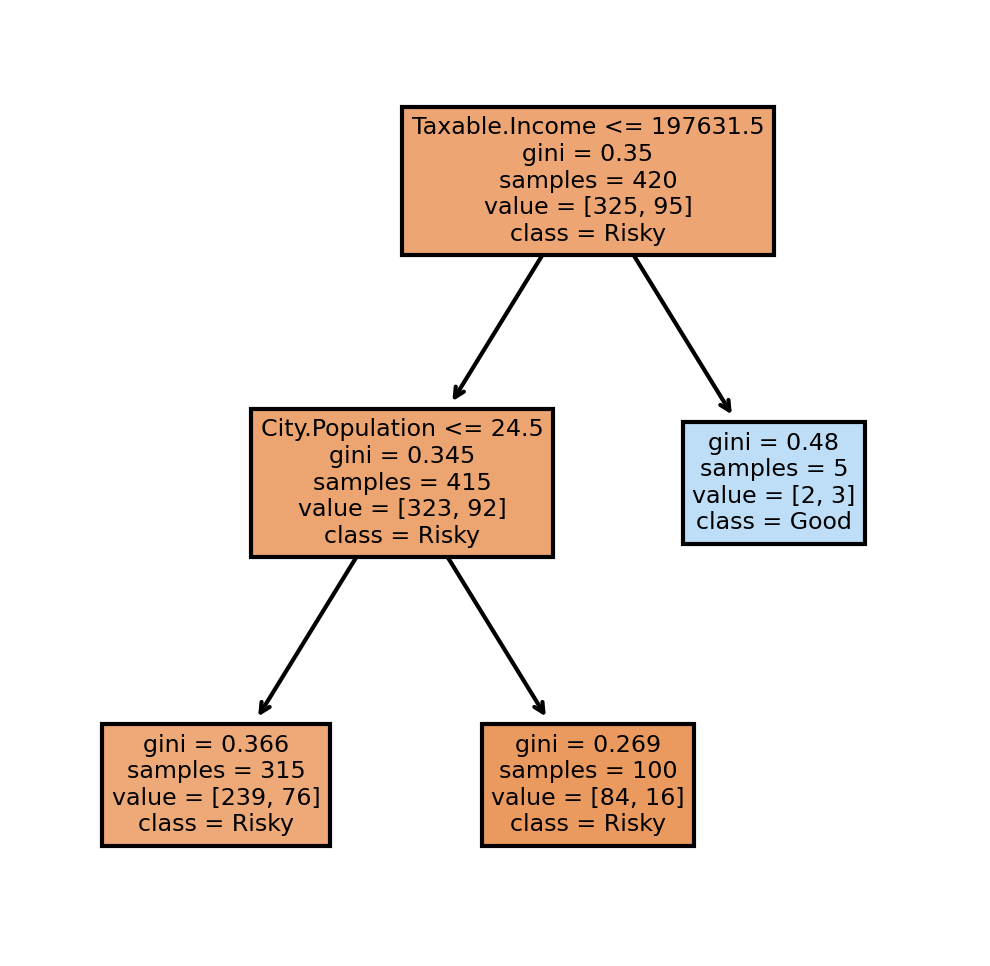

In [197]:
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experiance', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(figsize = (4,4), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [196]:
#scores=cross_val_score(model,x_train,y_train,cv=5)
print(scores.mean())

0.7714285714285715


# Scalling